# Assignment 1

# Word2Vec (Skipgram )

In [101]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [102]:
np.__version__, torch.__version__

('1.26.3', '2.1.2+cpu')

In [103]:
import matplotlib
matplotlib.__version__

'3.8.2'

## 1. Load data

In [104]:
with open ("./data.txt", "r") as doc:
    corpus = doc.read()

In [105]:
corpus

'Harry Potter is a popular fantasy book series written by J.K. Rowling. The series consists of seven books, following the life and adventures of a young wizard named Harry Potter. The story begins with Harry discovering on his eleventh birthday that he is a wizard and has been accepted to Hogwarts School of Witchcraft and Wizardry. At Hogwarts, Harry makes friends such as Hermione Granger and Ron Weasley, and together they uncover mysteries and face various magical challenges.\n\nThe overarching plot revolves around Harry\'s struggle against the dark wizard Lord Voldemort, who seeks to conquer the wizarding world and subjugate non-magical people. Harry learns about his own connection to Voldemort and the prophecy that foretells their final confrontation.\n\nThroughout the series, themes of friendship, courage, and the battle between good and evil are prevalent. As Harry matures, he faces numerous challenges, losses, and revelations. The story explores the complexities of the magical wo

In [106]:
#1. tokenization
corpus = [corpus.split(" ") for sent in corpus]
corpus[:20]

[['Harry',
  'Potter',
  'is',
  'a',
  'popular',
  'fantasy',
  'book',
  'series',
  'written',
  'by',
  'J.K.',
  'Rowling.',
  'The',
  'series',
  'consists',
  'of',
  'seven',
  'books,',
  'following',
  'the',
  'life',
  'and',
  'adventures',
  'of',
  'a',
  'young',
  'wizard',
  'named',
  'Harry',
  'Potter.',
  'The',
  'story',
  'begins',
  'with',
  'Harry',
  'discovering',
  'on',
  'his',
  'eleventh',
  'birthday',
  'that',
  'he',
  'is',
  'a',
  'wizard',
  'and',
  'has',
  'been',
  'accepted',
  'to',
  'Hogwarts',
  'School',
  'of',
  'Witchcraft',
  'and',
  'Wizardry.',
  'At',
  'Hogwarts,',
  'Harry',
  'makes',
  'friends',
  'such',
  'as',
  'Hermione',
  'Granger',
  'and',
  'Ron',
  'Weasley,',
  'and',
  'together',
  'they',
  'uncover',
  'mysteries',
  'and',
  'face',
  'various',
  'magical',
  'challenges.\n\nThe',
  'overarching',
  'plot',
  'revolves',
  'around',
  "Harry's",
  'struggle',
  'against',
  'the',
  'dark',
  'wizard'

# 2. Numericalization


In [107]:
#find unique words
flatten = lambda l: [item for sublist in l for item in sublist]
#assign unique integer
vocabs = list(set(flatten(corpus))) #all the words we have in the system - <UNK>

In [108]:
#vocabs

['world',
 'since',
 'overarching',
 'with',
 'in',
 'following',
 'life',
 'conquer',
 'themes',
 'makes',
 'confrontation.\n\nThroughout',
 'characters,',
 '"Harry',
 'certain',
 'against',
 'Stone,',
 'are',
 'he',
 'Harry',
 'all',
 'Wizardry.',
 'accepted',
 'cultural',
 'friendship,',
 'Potter',
 'Hogwarts.',
 'friends',
 'together',
 'J.K.',
 'of',
 'eleventh',
 'Lord',
 'discovering',
 'Granger',
 'they',
 'Hallows,"',
 'climactic',
 'delves',
 'explores',
 'phenomenon',
 'his',
 'become',
 'fantasy',
 'young',
 'popular',
 'wizard',
 'plot',
 'confronts',
 'birthday',
 'between',
 'their',
 'Witchcraft',
 'good',
 'faces',
 'consists',
 "Harry's",
 'people.',
 'ability',
 'been',
 'conclusion',
 '1997.\n\n\n\n\n',
 'on',
 'Stone,"',
 'written',
 'battle',
 'book,',
 'well-developed',
 'prophecy',
 'series,',
 'prevalent.',
 'Deathly',
 'into',
 'book',
 'world,',
 'brings',
 'foretells',
 'story',
 'Ron',
 'who',
 'release',
 'to',
 'Hermione',
 'Weasley,',
 'losses,',
 'revol

In [109]:
#create handy mapping between integer and word
word2index = {v:idx for idx, v in enumerate(vocabs)}
word2index

{'world': 0,
 'since': 1,
 'overarching': 2,
 'with': 3,
 'in': 4,
 'following': 5,
 'life': 6,
 'conquer': 7,
 'themes': 8,
 'makes': 9,
 'confrontation.\n\nThroughout': 10,
 'characters,': 11,
 '"Harry': 12,
 'certain': 13,
 'against': 14,
 'Stone,': 15,
 'are': 16,
 'he': 17,
 'Harry': 18,
 'all': 19,
 'Wizardry.': 20,
 'accepted': 21,
 'cultural': 22,
 'friendship,': 23,
 'Potter': 24,
 'Hogwarts.': 25,
 'friends': 26,
 'together': 27,
 'J.K.': 28,
 'of': 29,
 'eleventh': 30,
 'Lord': 31,
 'discovering': 32,
 'Granger': 33,
 'they': 34,
 'Hallows,"': 35,
 'climactic': 36,
 'delves': 37,
 'explores': 38,
 'phenomenon': 39,
 'his': 40,
 'become': 41,
 'fantasy': 42,
 'young': 43,
 'popular': 44,
 'wizard': 45,
 'plot': 46,
 'confronts': 47,
 'birthday': 48,
 'between': 49,
 'their': 50,
 'Witchcraft': 51,
 'good': 52,
 'faces': 53,
 'consists': 54,
 "Harry's": 55,
 'people.': 56,
 'ability': 57,
 'been': 58,
 'conclusion': 59,
 '1997.\n\n\n\n\n': 60,
 'on': 61,
 'Stone,"': 62,
 'writ

In [110]:
#Let's see the index of word Harry
word2index['Harry']

18

In [111]:
vocabs.append('<UNK>')
word2index['<UNK>'] = 159

In [112]:
vocabs[159]

'<UNK>'

## 2. Prepare train data

In [113]:
#create pairs of center word, and outside word

def random_batch(batch_size, corpus):
    window_size = 2
    skipgrams = []

    #loop each corpus
    for doc in corpus:
        #look from the 2nd word until second last word
        for i in range(window_size, len(doc)-1):
            #center word
            center = word2index[doc[i]]
            #outside words = 2 words
            outside = (word2index[doc[i-1]], word2index[doc[i+1]])
            #for each of these two outside words, we gonna append to a list
            for each_out in outside:
                skipgrams.append([center, each_out])
                #center, outside1;   center, outside2
                
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
    
    inputs, labels = [], []
    for index in random_index:
        inputs.append([skipgrams[index][0]])
        labels.append([skipgrams[index][1]])
        
    return np.array(inputs), np.array(labels)
            
x, y = random_batch(2, corpus)

In [114]:
x.shape  #batch_size, 1

(2, 1)

In [115]:
x

array([[141],
       [104]])

In [116]:
y.shape  #batch_size 1

(2, 1)

## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [117]:
len(vocabs)

160

In [118]:
voc_size = len(vocabs)
voc_size

160

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

In [119]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center, outside, all_vocabs):
        center_embedding     = self.embedding_center(center)  #(batch_size, 1, emb_size)
        outside_embedding    = self.embedding_center(outside) #(batch_size, 1, emb_size)
        all_vocabs_embedding = self.embedding_center(all_vocabs) #(batch_size, voc_size, emb_size)
        
        top_term = torch.exp(outside_embedding.bmm(center_embedding.transpose(1, 2)).squeeze(2))
        #batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) = (batch_size, 1) 

        lower_term = all_vocabs_embedding.bmm(center_embedding.transpose(1, 2)).squeeze(2)
        #batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size) 
        
        lower_term_sum = torch.sum(torch.exp(lower_term), 1)  #(batch_size, 1)
        
        loss = -torch.mean(torch.log(top_term / lower_term_sum))  #scalar
        
        return loss
        

In [120]:
#prepare all vocabs

batch_size = 2
voc_size   = len(vocabs)

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159],
        [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14

In [121]:
model = Skipgram(voc_size, 2)
model

Skipgram(
  (embedding_center): Embedding(160, 2)
  (embedding_outside): Embedding(160, 2)
)

In [122]:
input_tensor = torch.LongTensor(x)
label_tensor = torch.LongTensor(y)

In [123]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [124]:
loss

tensor(6.0180, grad_fn=<NegBackward0>)

## 4. Training

In [125]:
batch_size = 2
emb_size   = 2
model      = Skipgram(voc_size, emb_size)
optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [126]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [127]:
import time
num_epochs = 3000
training_start = time.time()

for epoch in range(num_epochs):
    
    #get batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_tensor = torch.LongTensor(input_batch)
    label_tensor = torch.LongTensor(label_batch)
    
    #predict
    loss = model(input_tensor, label_tensor, all_vocabs)
    
    #backprogate
    optimizer.zero_grad()
    loss.backward()
    
    #update alpha
    optimizer.step()

    training_end = time.time()

    epoch_minute, epoch_second = epoch_time(training_start, training_end)
    
    #print the loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1:6.0f} | Loss: {loss:2.6f} | time: {epoch_minute}mins {epoch_second}sec")

Epoch   1000 | Loss: 7.707176 | time: 18mins 22sec
Epoch   2000 | Loss: 5.542639 | time: 33mins 45sec
Epoch   3000 | Loss: 5.960446 | time: 48mins 39sec


## 5. Plot the embeddings

In [128]:
vocabs[:10]

['world',
 'since',
 'overarching',
 'with',
 'in',
 'following',
 'life',
 'conquer',
 'themes',
 'makes']

In [129]:
harry = torch.LongTensor([word2index['Harry']])
harry

tensor([18])

In [130]:
harry_embed_c = model.embedding_center(harry)
harry_embed_o = model.embedding_outside(harry)
harry_embed   = (harry_embed_c + harry_embed_o) / 2
harry_embed

tensor([[ 0.2006, -0.9710]], grad_fn=<DivBackward0>)

In [131]:
harry_embed_o

tensor([[-0.4017, -1.1281]], grad_fn=<EmbeddingBackward0>)

In [132]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
        
    word = torch.LongTensor([word2index[word]])
    
    embed_c = model.embedding_center(word)
    embed_o = model.embedding_outside(word)
    embed   = (embed_c + embed_o) / 2
    
    return embed[0][0].item(), embed[0][1].item()

In [133]:
get_embed('Potter')

(-0.0010532885789871216, -0.015232771635055542)

In [134]:
get_embed('Hogwarts')

(0.42843806743621826, -0.19557596743106842)

In [135]:
get_embed('wizard')

(0.09940272569656372, 0.11268818378448486)

In [136]:
get_embed('Harry')

(0.20057637989521027, -0.9710051417350769)

## Plotting the embeddings

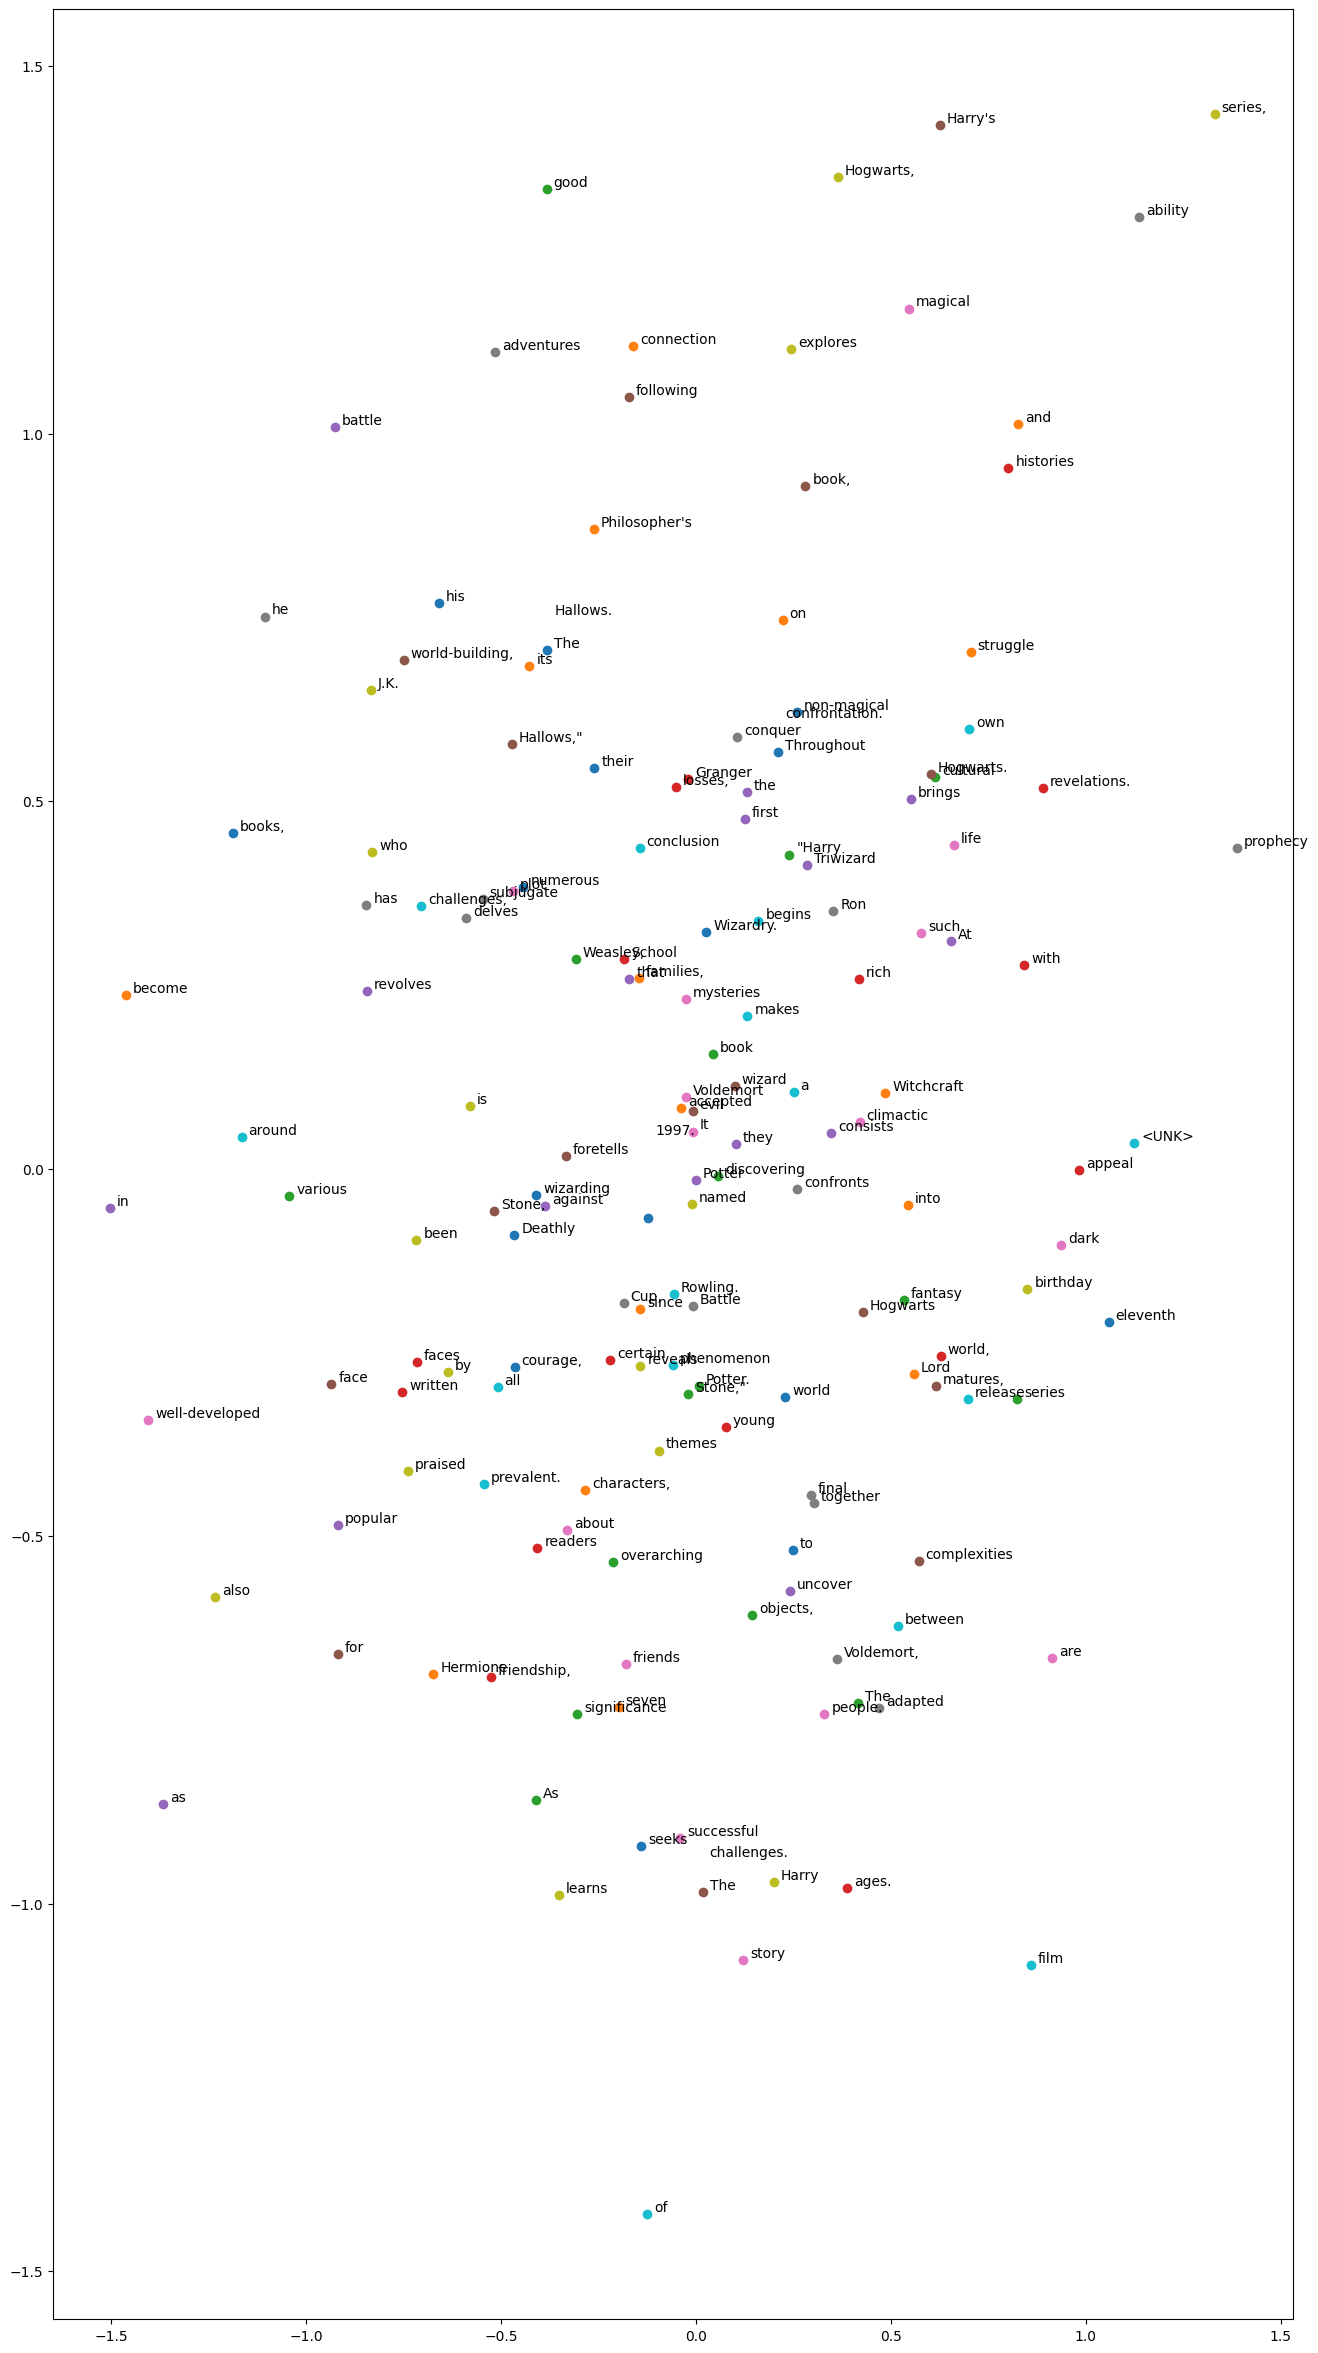

In [137]:
plt.figure(figsize=(16, 30))
for i, word in enumerate(vocabs):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()